In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns


IMPORTING DATA

In [2]:
mt = pd.read_csv("movies_metadata.csv")


C:\Users\Saurabh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
mt.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
mt.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [5]:
g = mt['genres'][0]


In [6]:
g

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [7]:
x = [gen for gen in set(re.findall('\w+'," ".join(re.findall('\D+'," ".join(re.findall('\w+',g)))))) if gen not in ['id','name']]

In [8]:
x

['Family', 'Comedy', 'Animation']

In [9]:
def cleanText(x):
    x = [gen for gen in set(re.findall('\w+'," ".join(re.findall('\D+'," ".join(re.findall('\w+',x)))))) if gen not in ['id','name']]
    
    return x

In [10]:
mt['genres'] = mt['genres'].apply(cleanText)

In [11]:
mt

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Family, Comedy, Animation]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Family, Fantasy, Adventure]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Comedy, Romance]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Romance, Drama]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[Family, Drama]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[Action, Thriller, Drama]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [12]:
mt['genres']

0         [Family, Comedy, Animation]
1        [Family, Fantasy, Adventure]
2                   [Comedy, Romance]
3            [Comedy, Romance, Drama]
4                            [Comedy]
                     ...             
45461                 [Family, Drama]
45462                         [Drama]
45463       [Action, Thriller, Drama]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [13]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

DATA CLEANING

In [14]:
mt.drop(["belongs_to_collection"],axis=1,inplace = True)

In [15]:
mt.drop(["homepage"],axis=1,inplace = True)

In [16]:
mt.drop(["poster_path"],axis=1,inplace = True)

In [17]:
mt.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,30000000,"[Family, Comedy, Animation]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,65000000,"[Family, Fantasy, Adventure]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,"[Comedy, Romance]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[Comedy, Romance, Drama]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [18]:
mt[(mt["budget"]=="0")]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
2,False,0,"[Comedy, Romance]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
4,False,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
7,False,0,"[Family, Action, Adventure, Drama]",45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
11,False,0,"[Comedy, Horror]",12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0
12,False,0,"[Family, Animation, Adventure]",21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[Family, Drama]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,0,"[Action, Thriller, Drama]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [19]:
mt.drop(["budget"],axis=1,inplace = True)

In [20]:
mt.drop(["tagline"],axis=1,inplace = True)

In [21]:
mt.drop(["revenue"],axis=1,inplace = True)

In [22]:
mt

,adult,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,"[Family, Comedy, Animation]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,"[Family, Fantasy, Adventure]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,"[Comedy, Romance]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,"[Comedy, Romance, Drama]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,"[Family, Drama]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45462,False,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45463,False,"[Action, Thriller, Drama]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45464,False,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [23]:
mt.drop(['production_companies'],axis=1,inplace = True)

In [24]:
mt.drop(['production_countries'],axis=1,inplace = True)

In [25]:
mt

,adult,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,"[Family, Comedy, Animation]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,"[Family, Fantasy, Adventure]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,"[Comedy, Romance]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,"[Comedy, Romance, Drama]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,"[Family, Drama]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45462,False,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45463,False,"[Action, Thriller, Drama]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45464,False,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [26]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45466 non-null  object 
 1   genres             45466 non-null  object 
 2   id                 45466 non-null  object 
 3   imdb_id            45449 non-null  object 
 4   original_language  45455 non-null  object 
 5   original_title     45466 non-null  object 
 6   overview           44512 non-null  object 
 7   popularity         45461 non-null  object 
 8   release_date       45379 non-null  object 
 9   runtime            45203 non-null  float64
 10  spoken_languages   45460 non-null  object 
 11  status             45379 non-null  object 
 12  title              45460 non-null  object 
 13  video              45460 non-null  object 
 14  vote_average       45460 non-null  float64
 15  vote_count         45460 non-null  float64
dtypes: float64(3), object(

In [27]:
mt.drop(["overview", "release_date","spoken_languages","original_title"], axis = 1, inplace=True)


In [28]:
mt

,adult,genres,id,imdb_id,original_language,popularity,runtime,status,title,video,vote_average,vote_count
0,False,"[Family, Comedy, Animation]",862,tt0114709,en,21.946943,81.0,Released,Toy Story,False,7.7,5415.0
1,False,"[Family, Fantasy, Adventure]",8844,tt0113497,en,17.015539,104.0,Released,Jumanji,False,6.9,2413.0
2,False,"[Comedy, Romance]",15602,tt0113228,en,11.7129,101.0,Released,Grumpier Old Men,False,6.5,92.0
3,False,"[Comedy, Romance, Drama]",31357,tt0114885,en,3.859495,127.0,Released,Waiting to Exhale,False,6.1,34.0
4,False,[Comedy],11862,tt0113041,en,8.387519,106.0,Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,"[Family, Drama]",439050,tt6209470,fa,0.072051,90.0,Released,Subdue,False,4.0,1.0
45462,False,[Drama],111109,tt2028550,tl,0.178241,360.0,Released,Century of Birthing,False,9.0,3.0
45463,False,"[Action, Thriller, Drama]",67758,tt0303758,en,0.903007,90.0,Released,Betrayal,False,3.8,6.0
45464,False,[],227506,tt0008536,en,0.003503,87.0,Released,Satan Triumphant,False,0.0,0.0


In [29]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45466 non-null  object 
 1   genres             45466 non-null  object 
 2   id                 45466 non-null  object 
 3   imdb_id            45449 non-null  object 
 4   original_language  45455 non-null  object 
 5   popularity         45461 non-null  object 
 6   runtime            45203 non-null  float64
 7   status             45379 non-null  object 
 8   title              45460 non-null  object 
 9   video              45460 non-null  object 
 10  vote_average       45460 non-null  float64
 11  vote_count         45460 non-null  float64
dtypes: float64(3), object(9)
memory usage: 4.2+ MB


In [30]:
mt.dropna(inplace= True )


In [31]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45100 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45100 non-null  object 
 1   genres             45100 non-null  object 
 2   id                 45100 non-null  object 
 3   imdb_id            45100 non-null  object 
 4   original_language  45100 non-null  object 
 5   popularity         45100 non-null  object 
 6   runtime            45100 non-null  float64
 7   status             45100 non-null  object 
 8   title              45100 non-null  object 
 9   video              45100 non-null  object 
 10  vote_average       45100 non-null  float64
 11  vote_count         45100 non-null  float64
dtypes: float64(3), object(9)
memory usage: 4.5+ MB


In [32]:
mt

,adult,genres,id,imdb_id,original_language,popularity,runtime,status,title,video,vote_average,vote_count
0,False,"[Family, Comedy, Animation]",862,tt0114709,en,21.946943,81.0,Released,Toy Story,False,7.7,5415.0
1,False,"[Family, Fantasy, Adventure]",8844,tt0113497,en,17.015539,104.0,Released,Jumanji,False,6.9,2413.0
2,False,"[Comedy, Romance]",15602,tt0113228,en,11.7129,101.0,Released,Grumpier Old Men,False,6.5,92.0
3,False,"[Comedy, Romance, Drama]",31357,tt0114885,en,3.859495,127.0,Released,Waiting to Exhale,False,6.1,34.0
4,False,[Comedy],11862,tt0113041,en,8.387519,106.0,Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,"[Family, Drama]",439050,tt6209470,fa,0.072051,90.0,Released,Subdue,False,4.0,1.0
45462,False,[Drama],111109,tt2028550,tl,0.178241,360.0,Released,Century of Birthing,False,9.0,3.0
45463,False,"[Action, Thriller, Drama]",67758,tt0303758,en,0.903007,90.0,Released,Betrayal,False,3.8,6.0
45464,False,[],227506,tt0008536,en,0.003503,87.0,Released,Satan Triumphant,False,0.0,0.0


In [33]:
mt.to_csv("moviedata")

In [34]:
mt.rename(columns = {"id":"movieId"},inplace = True)

In [35]:
mt.head()

,adult,genres,movieId,imdb_id,original_language,popularity,runtime,status,title,video,vote_average,vote_count
0,False,"[Family, Comedy, Animation]",862,tt0114709,en,21.946943,81.0,Released,Toy Story,False,7.7,5415.0
1,False,"[Family, Fantasy, Adventure]",8844,tt0113497,en,17.015539,104.0,Released,Jumanji,False,6.9,2413.0
2,False,"[Comedy, Romance]",15602,tt0113228,en,11.7129,101.0,Released,Grumpier Old Men,False,6.5,92.0
3,False,"[Comedy, Romance, Drama]",31357,tt0114885,en,3.859495,127.0,Released,Waiting to Exhale,False,6.1,34.0
4,False,[Comedy],11862,tt0113041,en,8.387519,106.0,Released,Father of the Bride Part II,False,5.7,173.0


In [36]:
mt[mt["movieId"]==949]

,adult,genres,movieId,imdb_id,original_language,popularity,runtime,status,title,video,vote_average,vote_count


In [37]:
mt['movieId'] = mt['movieId'].astype('int')


In [38]:
rg = pd.read_csv("ratings_small.csv")

In [39]:
rg.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [40]:
rg1 = rg.groupby ("movieId").agg(avg_rating = ("rating","mean"))
rg1

,avg_rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
...,...
161944,5.000000
162376,4.500000
162542,5.000000


MERGING DATA

In [41]:
mg = pd.merge(mt,rg,how = "inner", on = "movieId")

In [42]:
mg

,adult,genres,movieId,imdb_id,original_language,popularity,runtime,status,title,video,vote_average,vote_count,userId,rating,timestamp
0,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,23,3.5,1148721092
1,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,102,4.0,956598942
2,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,232,2.0,955092697
3,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,242,5.0,956688825
4,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,263,3.0,1117846575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44984,False,"[Romance, Drama]",64197,tt1047845,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,73,4.0,1441513491
44985,False,"[Romance, Drama]",64197,tt1047845,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,544,5.0,1435789819
44986,False,"[Romance, Drama]",64197,tt1047845,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,648,3.5,1241951834
44987,False,"[Comedy, Romance]",98604,tt2147597,ru,0.803588,91.0,Released,Cinderella,False,4.6,6.0,352,4.0,1420521986


In [43]:
ls = pd.read_csv("links_small.csv")

In [44]:
ls.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [45]:
lg = pd.merge(mg,ls,how = "inner", on = "movieId")

In [46]:
lg

,adult,genres,movieId,imdb_id,original_language,popularity,runtime,status,title,video,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId
0,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,23,3.5,1148721092,48028,220.0
1,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,102,4.0,956598942,48028,220.0
2,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,232,2.0,955092697,48028,220.0
3,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,242,5.0,956688825,48028,220.0
4,False,"[Action, Thriller, Crime, Drama]",949,tt0113277,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,263,3.0,1117846575,48028,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44984,False,"[Romance, Drama]",64197,tt1047845,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,73,4.0,1441513491,986233,10360.0
44985,False,"[Romance, Drama]",64197,tt1047845,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,544,5.0,1435789819,986233,10360.0
44986,False,"[Romance, Drama]",64197,tt1047845,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,648,3.5,1241951834,986233,10360.0
44987,False,"[Comedy, Romance]",98604,tt2147597,ru,0.803588,91.0,Released,Cinderella,False,4.6,6.0,352,4.0,1420521986,1798188,83389.0


In [47]:
lg.dropna(inplace= True )


In [48]:
lg.drop(["imdb_id"], axis = 1, inplace = True)

In [49]:
lg


,adult,genres,movieId,original_language,popularity,runtime,status,title,video,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId
0,False,"[Action, Thriller, Crime, Drama]",949,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,23,3.5,1148721092,48028,220.0
1,False,"[Action, Thriller, Crime, Drama]",949,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,102,4.0,956598942,48028,220.0
2,False,"[Action, Thriller, Crime, Drama]",949,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,232,2.0,955092697,48028,220.0
3,False,"[Action, Thriller, Crime, Drama]",949,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,242,5.0,956688825,48028,220.0
4,False,"[Action, Thriller, Crime, Drama]",949,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,263,3.0,1117846575,48028,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44984,False,"[Romance, Drama]",64197,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,73,4.0,1441513491,986233,10360.0
44985,False,"[Romance, Drama]",64197,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,544,5.0,1435789819,986233,10360.0
44986,False,"[Romance, Drama]",64197,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,648,3.5,1241951834,986233,10360.0
44987,False,"[Comedy, Romance]",98604,ru,0.803588,91.0,Released,Cinderella,False,4.6,6.0,352,4.0,1420521986,1798188,83389.0


In [50]:
kw = pd.read_csv("keywords.csv")


In [51]:
kw.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [52]:
k = kw["keywords"][0]
k

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [53]:
x = [kr for kr in set(re.findall('\w+'," ".join(re.findall('\D+'," ".join(re.findall('\w+',k)))))) if kr not in ['id','name']]

In [54]:

x

['boy',
 'toy',
 'new',
 'door',
 'friendship',
 'friends',
 'jealousy',
 'to',
 'rivalry',
 'next',
 'life',
 'comes']

In [55]:
def cleanText(x):
    x = [kr for kr in set(re.findall('\w+'," ".join(re.findall('\D+'," ".join(re.findall('\w+',x)))))) if kr not in ['id','name']]
    
    return x

In [56]:
kw['keywords'] = kw['keywords'].apply(cleanText)

In [57]:
kw

,id,keywords
0,862,"[boy, toy, new, door, friendship, friends, jea..."
1,8844,"[on, children, new, game, disappearance, based..."
2,15602,"[friend, fishing, best, duringcreditsstinger, ..."
3,31357,"[on, relationship, based, chick, novel, divorc..."
4,11862,"[contraception, relationship, baby, gynecologi..."
...,...,...
46414,439050,"[love, tragic]"
46415,111109,"[artist, pinoy, play]"
46416,67758,[]
46417,227506,[]


In [58]:
kw.rename(columns = {"id" : "movieId"},inplace = True)

In [59]:
lw = pd.merge(kw,lg,how = "inner",on = "movieId")

In [60]:
lw

,movieId,keywords,adult,genres,original_language,popularity,runtime,status,title,video,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId
0,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,7.7,1886.0,23,3.5,1148721092,48028,220.0
1,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,7.7,1886.0,102,4.0,956598942,48028,220.0
2,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,7.7,1886.0,232,2.0,955092697,48028,220.0
3,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,7.7,1886.0,242,5.0,956688825,48028,220.0
4,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,7.7,1886.0,263,3.0,1117846575,48028,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44996,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,73,4.0,1441513491,986233,10360.0
44997,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,544,5.0,1435789819,986233,10360.0
44998,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,648,3.5,1241951834,986233,10360.0
44999,98604,[],False,"[Comedy, Romance]",ru,0.803588,91.0,Released,Cinderella,False,4.6,6.0,352,4.0,1420521986,1798188,83389.0


In [61]:
cd = pd.read_csv("credits.csv")
cd

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [62]:
from ast import literal_eval

In [63]:
cd['cast'] = cd['cast'].apply(literal_eval)
cd['crew'] = cd['crew'].apply(literal_eval)


In [64]:
cd['cast_size'] = cd['cast'].apply(lambda x: len(x))
cd['crew_size'] = cd['crew'].apply(lambda x: len(x))

In [65]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan


In [66]:
cd['director'] = cd['crew'].apply(get_director)

In [67]:
cd['cast'] = cd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
cd['cast'] = cd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)


In [68]:
cd.drop(["crew"],axis = 1,inplace = True)

In [69]:
cd

,cast,id,cast_size,crew_size,director
0,"[Tom Hanks, Tim Allen, Don Rickles]",862,13,106,John Lasseter
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",8844,26,16,Joe Johnston
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]",15602,7,4,Howard Deutch
3,"[Whitney Houston, Angela Bassett, Loretta Devine]",31357,10,10,Forest Whitaker
4,"[Steve Martin, Diane Keaton, Martin Short]",11862,12,7,Charles Shyer
...,...,...,...,...,...
45471,"[Leila Hatami, Kourosh Tahami, Elham Korda]",439050,3,9,Hamid Nematollah
45472,"[Angel Aquino, Perry Dizon, Hazel Orencio]",111109,11,6,Lav Diaz
45473,"[Erika Eleniak, Adam Baldwin, Julie du Page]",67758,15,5,Mark L. Lester
45474,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",227506,5,2,Yakov Protazanov


In [70]:
cd.rename(columns = {"id" : "movieId"},inplace = True)

In [71]:
ld= pd.merge(lw,cd, how = "inner",on = "movieId")

In [72]:
ld

,movieId,keywords,adult,genres,original_language,popularity,runtime,status,title,video,...,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast,cast_size,crew_size,director
0,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,23,3.5,1148721092,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
1,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,102,4.0,956598942,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
2,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,232,2.0,955092697,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
3,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,242,5.0,956688825,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
4,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,263,3.0,1117846575,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,73,4.0,1441513491,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45019,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,544,5.0,1435789819,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45020,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,648,3.5,1241951834,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45021,98604,[],False,"[Comedy, Romance]",ru,0.803588,91.0,Released,Cinderella,False,...,6.0,352,4.0,1420521986,1798188,83389.0,"[Kristina Asmus, Nikita Efremov, Artyom Tkache...",18,4,Sergey Ivanov


In [73]:
ld.dropna(inplace=True)

In [74]:
ld.columns

Index(['movieId', 'keywords', 'adult', 'genres', 'original_language',
       'popularity', 'runtime', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'userId', 'rating', 'timestamp', 'imdbId', 'tmdbId',
       'cast', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [75]:
ld

,movieId,keywords,adult,genres,original_language,popularity,runtime,status,title,video,...,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast,cast_size,crew_size,director
0,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,23,3.5,1148721092,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
1,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,102,4.0,956598942,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
2,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,232,2.0,955092697,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
3,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,242,5.0,956688825,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
4,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,263,3.0,1117846575,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,73,4.0,1441513491,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45019,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,544,5.0,1435789819,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45020,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,648,3.5,1241951834,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45021,98604,[],False,"[Comedy, Romance]",ru,0.803588,91.0,Released,Cinderella,False,...,6.0,352,4.0,1420521986,1798188,83389.0,"[Kristina Asmus, Nikita Efremov, Artyom Tkache...",18,4,Sergey Ivanov


In [76]:
ld.to_csv("movie_data1")

In [77]:
ld["director"] = list(ld["director"])


In [78]:
ld

,movieId,keywords,adult,genres,original_language,popularity,runtime,status,title,video,...,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast,cast_size,crew_size,director
0,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,23,3.5,1148721092,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
1,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,102,4.0,956598942,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
2,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,232,2.0,955092697,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
3,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,242,5.0,956688825,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
4,949,"[robbery, film, last, shooting, suspense, noir...",False,"[Action, Thriller, Crime, Drama]",en,17.924927,170.0,Released,Heat,False,...,1886.0,263,3.0,1117846575,48028,220.0,"[Al Pacino, Robert De Niro, Val Kilmer]",65,71,Michael Mann
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,73,4.0,1441513491,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45019,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,544,5.0,1435789819,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45020,64197,"[director, woman]",False,"[Romance, Drama]",ru,0.528657,97.0,Released,Travelling with Pets,False,...,5.0,648,3.5,1241951834,986233,10360.0,"[Dmitriy Dyuzhev, Kseniya Kutepova, Anna Mikha...",6,4,Vera Storozheva
45021,98604,[],False,"[Comedy, Romance]",ru,0.803588,91.0,Released,Cinderella,False,...,6.0,352,4.0,1420521986,1798188,83389.0,"[Kristina Asmus, Nikita Efremov, Artyom Tkache...",18,4,Sergey Ivanov


In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [80]:
ld['soup'] = ld['keywords'] + ld['cast'] + ld['genres']
ld['soup'] = ld['soup'].apply(lambda x: ' '.join(x))


In [81]:
ld.drop(["keywords","genres","cast"], axis = 1, inplace = True)

In [82]:
ld

,movieId,adult,original_language,popularity,runtime,status,title,video,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast_size,crew_size,director,soup
0,949,False,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,23,3.5,1148721092,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
1,949,False,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,102,4.0,956598942,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
2,949,False,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,232,2.0,955092697,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
3,949,False,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,242,5.0,956688825,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
4,949,False,en,17.924927,170.0,Released,Heat,False,7.7,1886.0,263,3.0,1117846575,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,False,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,73,4.0,1441513491,986233,10360.0,6,4,Vera Storozheva,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45019,64197,False,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,544,5.0,1435789819,986233,10360.0,6,4,Vera Storozheva,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45020,64197,False,ru,0.528657,97.0,Released,Travelling with Pets,False,6.0,5.0,648,3.5,1241951834,986233,10360.0,6,4,Vera Storozheva,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45021,98604,False,ru,0.803588,91.0,Released,Cinderella,False,4.6,6.0,352,4.0,1420521986,1798188,83389.0,18,4,Sergey Ivanov,Kristina Asmus Nikita Efremov Artyom Tkachenko...


In [83]:
from sklearn import preprocessing

In [84]:
label_encoder = preprocessing.LabelEncoder()
ld['adult']= label_encoder.fit_transform(ld['adult'])
ld['adult'].unique()


array([0, 1])

In [85]:
label_encoder = preprocessing.LabelEncoder()
ld['original_language']= label_encoder.fit_transform(ld['original_language'])
ld['original_language'].unique()


array([ 6, 10, 20, 15,  0, 24,  5,  7, 14, 25, 27,  4,  3, 22, 35,  9, 30,
       12,  2, 32, 18, 19,  8, 11, 36, 33, 23, 13,  1, 21, 34, 16, 31, 17,
       28, 26, 29])

In [86]:
label_encoder = preprocessing.LabelEncoder()
ld['status']= label_encoder.fit_transform(ld['status'])
ld['status'].unique()


array([2, 3, 1, 0])

In [87]:
ld.drop(["video"],axis = 1,inplace = True)

In [88]:
ld

,movieId,adult,original_language,popularity,runtime,status,title,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast_size,crew_size,director,soup
0,949,0,6,17.924927,170.0,2,Heat,7.7,1886.0,23,3.5,1148721092,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
1,949,0,6,17.924927,170.0,2,Heat,7.7,1886.0,102,4.0,956598942,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
2,949,0,6,17.924927,170.0,2,Heat,7.7,1886.0,232,2.0,955092697,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
3,949,0,6,17.924927,170.0,2,Heat,7.7,1886.0,242,5.0,956688825,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
4,949,0,6,17.924927,170.0,2,Heat,7.7,1886.0,263,3.0,1117846575,48028,220.0,65,71,Michael Mann,robbery film last shooting suspense noir maste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,0,25,0.528657,97.0,2,Travelling with Pets,6.0,5.0,73,4.0,1441513491,986233,10360.0,6,4,Vera Storozheva,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45019,64197,0,25,0.528657,97.0,2,Travelling with Pets,6.0,5.0,544,5.0,1435789819,986233,10360.0,6,4,Vera Storozheva,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45020,64197,0,25,0.528657,97.0,2,Travelling with Pets,6.0,5.0,648,3.5,1241951834,986233,10360.0,6,4,Vera Storozheva,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45021,98604,0,25,0.803588,91.0,2,Cinderella,4.6,6.0,352,4.0,1420521986,1798188,83389.0,18,4,Sergey Ivanov,Kristina Asmus Nikita Efremov Artyom Tkachenko...


In [89]:
ld["agg"] = ld[["soup","director"]].apply(lambda x: "-".join(x), axis =1)




In [90]:
ld.drop(["director","soup","title"], axis = 1, inplace = True)

In [91]:
ld

,movieId,adult,original_language,popularity,runtime,status,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast_size,crew_size,agg
0,949,0,6,17.924927,170.0,2,7.7,1886.0,23,3.5,1148721092,48028,220.0,65,71,robbery film last shooting suspense noir maste...
1,949,0,6,17.924927,170.0,2,7.7,1886.0,102,4.0,956598942,48028,220.0,65,71,robbery film last shooting suspense noir maste...
2,949,0,6,17.924927,170.0,2,7.7,1886.0,232,2.0,955092697,48028,220.0,65,71,robbery film last shooting suspense noir maste...
3,949,0,6,17.924927,170.0,2,7.7,1886.0,242,5.0,956688825,48028,220.0,65,71,robbery film last shooting suspense noir maste...
4,949,0,6,17.924927,170.0,2,7.7,1886.0,263,3.0,1117846575,48028,220.0,65,71,robbery film last shooting suspense noir maste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,0,25,0.528657,97.0,2,6.0,5.0,73,4.0,1441513491,986233,10360.0,6,4,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45019,64197,0,25,0.528657,97.0,2,6.0,5.0,544,5.0,1435789819,986233,10360.0,6,4,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45020,64197,0,25,0.528657,97.0,2,6.0,5.0,648,3.5,1241951834,986233,10360.0,6,4,director woman Dmitriy Dyuzhev Kseniya Kutepov...
45021,98604,0,25,0.803588,91.0,2,4.6,6.0,352,4.0,1420521986,1798188,83389.0,18,4,Kristina Asmus Nikita Efremov Artyom Tkachenko...


In [92]:
agg_ = ld['agg']

In [93]:
cv = CountVectorizer(ngram_range=(1,2), min_df=0.01)
x = cv.fit_transform(agg_)

In [94]:
df = pd.DataFrame(x.A,columns=cv.get_feature_names())

C:\Users\Saurabh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
df

,abuse,accused,action,action adventure,action crime,action fiction,action horror,action thriller,addiction,adult,...,williams,willis,witch,woman,women,worker,world,york,young,youth
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
44948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
44949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
44950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DIMENSION REDUCTION

In [96]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA()
pca.fit(df)

PCA()

In [101]:
pca.explained_variance_ratio_*100

array([5.04300484e+00, 3.78430499e+00, 2.84845020e+00, 2.49138877e+00,
       2.17833750e+00, 1.86888242e+00, 1.79315170e+00, 1.67425538e+00,
       1.58691007e+00, 1.52914129e+00, 1.47127993e+00, 1.34719551e+00,
       1.33676411e+00, 1.30045969e+00, 1.21316976e+00, 1.20451363e+00,
       1.15347632e+00, 1.10913182e+00, 1.04813575e+00, 1.03810362e+00,
       1.02237154e+00, 9.81903354e-01, 9.57927429e-01, 9.44474773e-01,
       9.08789740e-01, 8.96590525e-01, 8.91928950e-01, 8.57841053e-01,
       7.79729189e-01, 7.70121114e-01, 7.51303351e-01, 7.35125688e-01,
       7.10589183e-01, 7.05532551e-01, 6.84686452e-01, 6.65378145e-01,
       6.47808765e-01, 6.36576327e-01, 6.29049491e-01, 6.19168946e-01,
       6.10523721e-01, 5.80630125e-01, 5.73831823e-01, 5.63786794e-01,
       5.39882576e-01, 5.22413343e-01, 5.18266510e-01, 5.13076707e-01,
       5.05970449e-01, 4.93732625e-01, 4.84068084e-01, 4.77847627e-01,
       4.68116702e-01, 4.64283537e-01, 4.50821436e-01, 4.47051977e-01,
      

In [102]:
len(pca.explained_variance_ratio_)

491

In [103]:
cum_evar = np.cumsum(pca.explained_variance_ratio_)
print(len(cum_evar[cum_evar < 0.90]))

197


In [104]:
import matplotlib.pyplot as plt

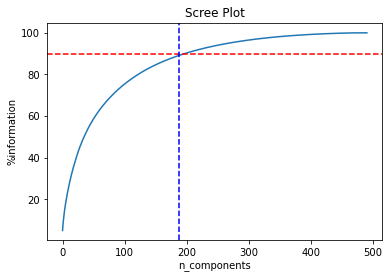

In [112]:
sns.lineplot(x=np.arange(0,pca.n_components_),y=np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('n_components')
plt.ylabel('%information')
plt.title('Scree Plot')
plt.axhline(90,color='red',linestyle='--')
plt.axvline(187,color='blue',linestyle='--')
plt.show()

In [114]:
pca = PCA(n_components=187)
pca.fit(df)

PCA(n_components=187)

In [115]:
df_pca = pca.transform(df)

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
ss = StandardScaler()
scaled1 = ss.fit_transform(df_pca)

In [119]:
scaled1 = pd.DataFrame(scaled1)
scaled1

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-1.507386,-0.078179,0.907593,-0.080849,1.279271,-0.879014,0.863692,-0.728137,-2.909183,0.140008
1,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-1.507386,-0.078179,0.907593,-0.080849,1.279271,-0.879014,0.863692,-0.728137,-2.909183,0.140008
2,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-1.507386,-0.078179,0.907593,-0.080849,1.279271,-0.879014,0.863692,-0.728137,-2.909183,0.140008
3,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-1.507386,-0.078179,0.907593,-0.080849,1.279271,-0.879014,0.863692,-0.728137,-2.909183,0.140008
4,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-1.507386,-0.078179,0.907593,-0.080849,1.279271,-0.879014,0.863692,-0.728137,-2.909183,0.140008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44947,-1.047000,-0.205497,0.015474,-0.214312,-1.467332,-0.958373,-0.399887,0.564237,-0.425875,0.561179,...,-0.671593,-0.095625,0.388581,-0.476116,0.520126,-0.844503,-0.085402,-0.143796,-0.644252,-0.003847
44948,-1.047000,-0.205497,0.015474,-0.214312,-1.467332,-0.958373,-0.399887,0.564237,-0.425875,0.561179,...,-0.671593,-0.095625,0.388581,-0.476116,0.520126,-0.844503,-0.085402,-0.143796,-0.644252,-0.003847
44949,-1.047000,-0.205497,0.015474,-0.214312,-1.467332,-0.958373,-0.399887,0.564237,-0.425875,0.561179,...,-0.671593,-0.095625,0.388581,-0.476116,0.520126,-0.844503,-0.085402,-0.143796,-0.644252,-0.003847
44950,-0.518620,-1.050690,-1.577121,0.193027,-0.685438,0.183090,0.538885,-0.059599,-0.402118,0.152098,...,-0.145098,-0.444908,-0.139129,-0.002266,-0.233415,0.035458,0.014877,-0.231122,0.332686,-0.171193


In [120]:
ld1 = ld.drop(["agg"], axis = 1, inplace = True)


In [121]:
ld

,movieId,adult,original_language,popularity,runtime,status,vote_average,vote_count,userId,rating,timestamp,imdbId,tmdbId,cast_size,crew_size
0,949,0,6,17.924927,170.0,2,7.7,1886.0,23,3.5,1148721092,48028,220.0,65,71
1,949,0,6,17.924927,170.0,2,7.7,1886.0,102,4.0,956598942,48028,220.0,65,71
2,949,0,6,17.924927,170.0,2,7.7,1886.0,232,2.0,955092697,48028,220.0,65,71
3,949,0,6,17.924927,170.0,2,7.7,1886.0,242,5.0,956688825,48028,220.0,65,71
4,949,0,6,17.924927,170.0,2,7.7,1886.0,263,3.0,1117846575,48028,220.0,65,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45018,64197,0,25,0.528657,97.0,2,6.0,5.0,73,4.0,1441513491,986233,10360.0,6,4
45019,64197,0,25,0.528657,97.0,2,6.0,5.0,544,5.0,1435789819,986233,10360.0,6,4
45020,64197,0,25,0.528657,97.0,2,6.0,5.0,648,3.5,1241951834,986233,10360.0,6,4
45021,98604,0,25,0.803588,91.0,2,4.6,6.0,352,4.0,1420521986,1798188,83389.0,18,4


In [122]:
ss = StandardScaler()
scaled2 = ss.fit_transform(ld)

In [123]:
scaled2 = pd.DataFrame(scaled2)
scaled2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.316430,-0.004717,-0.315842,1.443066,2.453323,-0.02556,1.014576,0.996805,-1.657943,-0.057445,0.316996,-0.515821,-0.486358,2.133468,1.328265
1,-0.316430,-0.004717,-0.315842,1.443066,2.453323,-0.02556,1.014576,0.996805,-1.252495,0.417409,-0.706652,-0.515821,-0.486358,2.133468,1.328265
2,-0.316430,-0.004717,-0.315842,1.443066,2.453323,-0.02556,1.014576,0.996805,-0.585302,-1.482005,-0.714677,-0.515821,-0.486358,2.133468,1.328265
3,-0.316430,-0.004717,-0.315842,1.443066,2.453323,-0.02556,1.014576,0.996805,-0.533980,1.367116,-0.706173,-0.515821,-0.486358,2.133468,1.328265
4,-0.316430,-0.004717,-0.315842,1.443066,2.453323,-0.02556,1.014576,0.996805,-0.426202,-0.532298,0.152493,-0.515821,-0.486358,2.133468,1.328265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44947,3.693975,-0.004717,4.255528,-1.130707,-0.483656,-0.02556,-0.606787,-0.545432,-1.401331,0.417409,1.877026,3.866270,0.106649,-0.811398,-0.684120
44948,3.693975,-0.004717,4.255528,-1.130707,-0.483656,-0.02556,-0.606787,-0.545432,1.015961,1.367116,1.846529,3.866270,0.106649,-0.811398,-0.684120
44949,3.693975,-0.004717,4.255528,-1.130707,-0.483656,-0.02556,-0.606787,-0.545432,1.549716,-0.057445,0.813740,3.866270,0.106649,-0.811398,-0.684120
44950,5.875641,-0.004717,4.255528,-1.090031,-0.725051,-0.02556,-1.942026,-0.544612,0.030568,0.417409,1.765181,7.658682,4.377532,-0.212442,-0.684120


In [124]:
 df_new = pd.concat([scaled1,scaled2],axis=1)

In [125]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,5,6,7,8,9,10,11,12,13,14
0,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-0.02556,1.014576,0.996805,-1.657943,-0.057445,0.316996,-0.515821,-0.486358,2.133468,1.328265
1,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-0.02556,1.014576,0.996805,-1.252495,0.417409,-0.706652,-0.515821,-0.486358,2.133468,1.328265
2,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-0.02556,1.014576,0.996805,-0.585302,-1.482005,-0.714677,-0.515821,-0.486358,2.133468,1.328265
3,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-0.02556,1.014576,0.996805,-0.533980,1.367116,-0.706173,-0.515821,-0.486358,2.133468,1.328265
4,0.846989,3.566190,-0.607514,1.706831,0.405394,1.534292,-1.089848,0.352534,-0.458765,0.431402,...,-0.02556,1.014576,0.996805,-0.426202,-0.532298,0.152493,-0.515821,-0.486358,2.133468,1.328265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44947,-1.047000,-0.205497,0.015474,-0.214312,-1.467332,-0.958373,-0.399887,0.564237,-0.425875,0.561179,...,-0.02556,-0.606787,-0.545432,-1.401331,0.417409,1.877026,3.866270,0.106649,-0.811398,-0.684120
44948,-1.047000,-0.205497,0.015474,-0.214312,-1.467332,-0.958373,-0.399887,0.564237,-0.425875,0.561179,...,-0.02556,-0.606787,-0.545432,1.015961,1.367116,1.846529,3.866270,0.106649,-0.811398,-0.684120
44949,-1.047000,-0.205497,0.015474,-0.214312,-1.467332,-0.958373,-0.399887,0.564237,-0.425875,0.561179,...,-0.02556,-0.606787,-0.545432,1.549716,-0.057445,0.813740,3.866270,0.106649,-0.811398,-0.684120
44950,-0.518620,-1.050690,-1.577121,0.193027,-0.685438,0.183090,0.538885,-0.059599,-0.402118,0.152098,...,-0.02556,-1.942026,-0.544612,0.030568,0.417409,1.765181,7.658682,4.377532,-0.212442,-0.684120


CLUSTERING OF DATA ON FEATURES

In [126]:
from sklearn.cluster import OPTICS

In [127]:
clustering = OPTICS(min_samples = 2).fit(df_new)

C:\Users\Saurabh\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [128]:
clustering.labels_

array([ -1,  -1,  -1, ..., 300,  -1,  -1])

In [129]:
lst1 = list(clustering.labels_)
np.unique(lst1)

array([   -1,     0,     1, ..., 12560, 12561, 12562])

In [130]:
temp = pd.DataFrame(clustering.labels_,columns = ["cluster"])

In [131]:
temp

,cluster
0,-1
1,-1
2,-1
3,0
4,-1
...,...
44947,300
44948,300
44949,300
44950,-1


In [132]:
temp.to_csv("clusters2")